<a href="https://colab.research.google.com/github/micah-shull/loan_defaults/blob/main/loan_defaults_007_eda_categorical_data_chi_square_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

This dataset contains information on clients' credit card behavior, provided by a financial institution in Taiwan. The target variable is `default_payment_next_month`, which indicates whether the client defaulted on their credit card payment the next month.

url = https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

#### Variables:

- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.

#### Payment History (PAY_X):
- **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in August 2005.
- **PAY_3**: Repayment status in July 2005.
- **PAY_4**: Repayment status in June 2005.
- **PAY_5**: Repayment status in May 2005.
- **PAY_6**: Repayment status in April 2005.

#### Bill Statement Amount (BILL_AMT_X):
- **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollars).
- **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollars).
- **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollars).
- **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollars).
- **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollars).
- **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollars).

#### Previous Payment Amount (PAY_AMT_X):
- **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollars).
- **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollars).
- **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollars).
- **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollars).
- **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollars).
- **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollars).

- **default_payment_next_month**: Default payment indicator (1 = yes, 0 = no).

#### Explanation for Feature Reordering:
The bill statement and payment amounts are listed in reverse chronological order in the dataset. To ensure that the feature names match the actual sequence of events, we reverse the column names for `BILL_AMT` and `PAY_AMT` features so that they correctly represent the time sequence from April 2005 to September 2005.



## Load & Preprocess Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loan_data_utils import (load_data_from_url, clean_column_names, remove_id_column, rename_pay_columns, rename_bill_and_payment_columns,
                             label_pay_columns, convert_pay_columns_to_ordinal, reorder_columns, convert_education_to_ordinal, process_sex_column,
                             process_marriage_column, convert_ordinal_to_category, check_column_integrity, validate_data_types,
                             check_categorical_order, primary_columns, bill_columns, pay_columns, ordinal_columns)
from eda_utils import data_overview, plot_univariate_distributions, plot_class_distribution
import logging

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'marriage']
target = 'default_payment_next_month'

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            # Include the target column from the start
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)
            df = process_marriage_column(df)
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            # Drop duplicates consistently across both features and target
            df = df.drop_duplicates()

            logging.info("Data loaded and preprocessed successfully.")
            return df
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None
    return None

# Now, load the data
df = load_and_preprocess_data(url, categorical_columns, target)

if df is not None:
    # Ensure the target column is treated as a categorical variable
    df[target] = df[target].astype('category')

    # Print data overview
    data_overview(df)

    # Drop duplicate rows (optional if you didn’t remove them earlier)
    df = df.drop_duplicates()

    # Confirm the duplicates are removed
    print(f"Number of Duplicate Rows After Dropping: {df.duplicated().sum()}")

    # List of columns to check
    pay_cols = [col for col in df.columns if col.startswith('pay_delay')]

    # Check the order of categorical columns
    check_categorical_order(df, categorical_columns + pay_cols)
else:
    print("Error loading and preprocessing data.")


Missing Values: 0
Missing Percentage: 0.0
Number of Duplicate Rows: 0

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   29965 non-null  int64   
 1   sex                         29965 non-null  category
 2   education                   29965 non-null  category
 3   marriage                    29965 non-null  category
 4   age                         29965 non-null  int64   
 5   bill_amt_4_april            29965 non-null  int64   
 6   bill_amt_5_may              29965 non-null  int64   
 7   bill_amt_6_june             29965 non-null  int64   
 8   bill_amt_7_july             29965 non-null  int64   
 9   bill_amt_8_august           29965 non-null  int64   
 10  bill_amt_9_september        29965 non-null  int64   
 11  pay_amt_4_april             29965 non-null  int64   
 12  pay_amt_

In [ ]:
df['default_payment_next_month'].cat.categories

Index([0, 1], dtype='int64')

#### Categorical Data Analysis Script

In [ ]:
script_content = r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe `df` is already loaded

# List of categorical and ordinal columns
categorical_columns = [
    'default_payment_next_month', 'sex', 'education', 'marriage'
]

ordinal_columns = [
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]

def plot_categorical_distributions(df, categorical_columns):
    """Function to plot categorical distributions."""
    plt.figure(figsize=(16, 14))
    sns.set_context('talk')
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=df, x=column, hue=column, palette='Set3', legend=False)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


def plot_ordinal_distributions(df, ordinal_columns):
    """Function to plot ordinal distributions using barplot with hue."""
    plt.figure(figsize=(16, 25))
    sns.set_context('talk', font_scale=0.8)
    for i, column in enumerate(ordinal_columns, 1):
        plt.subplot(3, 2, i)

        # Get the counts for each category
        category_counts = df[column].value_counts().sort_index()

        sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='Set3')

        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Rotate x-tick labels for better legibility
        plt.xticks(rotation=45, ha='right')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


'''

# Write the script to a file
with open("categorical_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to categorical_data_utils.py")
# Reload script to make functions available for use
import importlib
import categorical_data_utils
importlib.reload(categorical_data_utils)

from categorical_data_utils import *


Script successfully written to categorical_data_utils.py


## Categorical Data Exploration

### Step 1: Explore Categorical Data Distributions
1. **Distribution Visualization**:
    - Plot bar charts for each categorical feature to visualize the frequency of each category. This will help you spot imbalanced categories or potential outliers.
    - Include percentage annotations to better understand the distribution.

2. **Frequency Analysis**:
    - Calculate the frequency and percentage of each category within the features to quantify how prevalent each category is.
    - Identify categories that have very few samples, which might impact the model's ability to generalize.

### Step 2: Identify Outliers or Small Categories
1. **Threshold-Based Analysis**:
    - Set a threshold for the minimum number or percentage of samples a category should have. Categories below this threshold could be flagged as outliers.

2. **Cross-Feature Analysis**:
    - Analyze the relationship between small categories and the target variable. Use statistical tests (e.g., chi-square tests) to determine if these small categories have a significant impact.

### Step 3: Statistical Significance Testing
1. **Chi-Square Test**:
    - For each categorical feature, perform a chi-square test to evaluate the relationship between the categories and the target variable.
    - Determine which categories are statistically significant and should be kept, combined, or removed.

2. **Fisher’s Exact Test**:
    - If some categories have very low frequencies, use Fisher’s Exact Test as an alternative to the chi-square test.

### Step 4: Handle Small or Insignificant Categories
1. **Combining Categories**:
    - Combine small or similar categories into a larger “Other” category if they are not statistically significant.
    - Group categories based on domain knowledge or similarity to enhance model interpretability.

2. **Removing Categories**:
    - If certain categories show little to no relevance after the statistical tests, consider removing them.

### Step 5: Encoding Categorical Data
1. **Ordinal Encoding**:
    - If the categories have an inherent order (e.g., education levels), use ordinal encoding.

2. **One-Hot Encoding**:
    - For non-ordinal features, use one-hot encoding while considering how many new features it introduces. This method works best if the categories are balanced.

### Step 6: Preprocessing Pipeline and Final Validation
1. **Create a Categorical Data Pipeline**:
    - Build a pipeline that handles preprocessing steps like encoding, category grouping, and category removal.
  
2. **Feature Importance Analysis**:
    - After preparing the data, evaluate the importance of categorical features using tree-based models (e.g., Random Forest) or model-based selection techniques.

3. **Model Performance Comparison**:
    - Compare the model's performance before and after handling categorical features to confirm that the preprocessing steps enhanced performance.

### Next Steps:
- Implement code to perform each step incrementally.
- Track metrics such as accuracy, precision, recall, and F1-score to guide further tuning.

This strategy should allow you to thoroughly explore and prepare your categorical data for machine learning. Let me know if you’re ready to start implementing this!

### Distributions Visualization

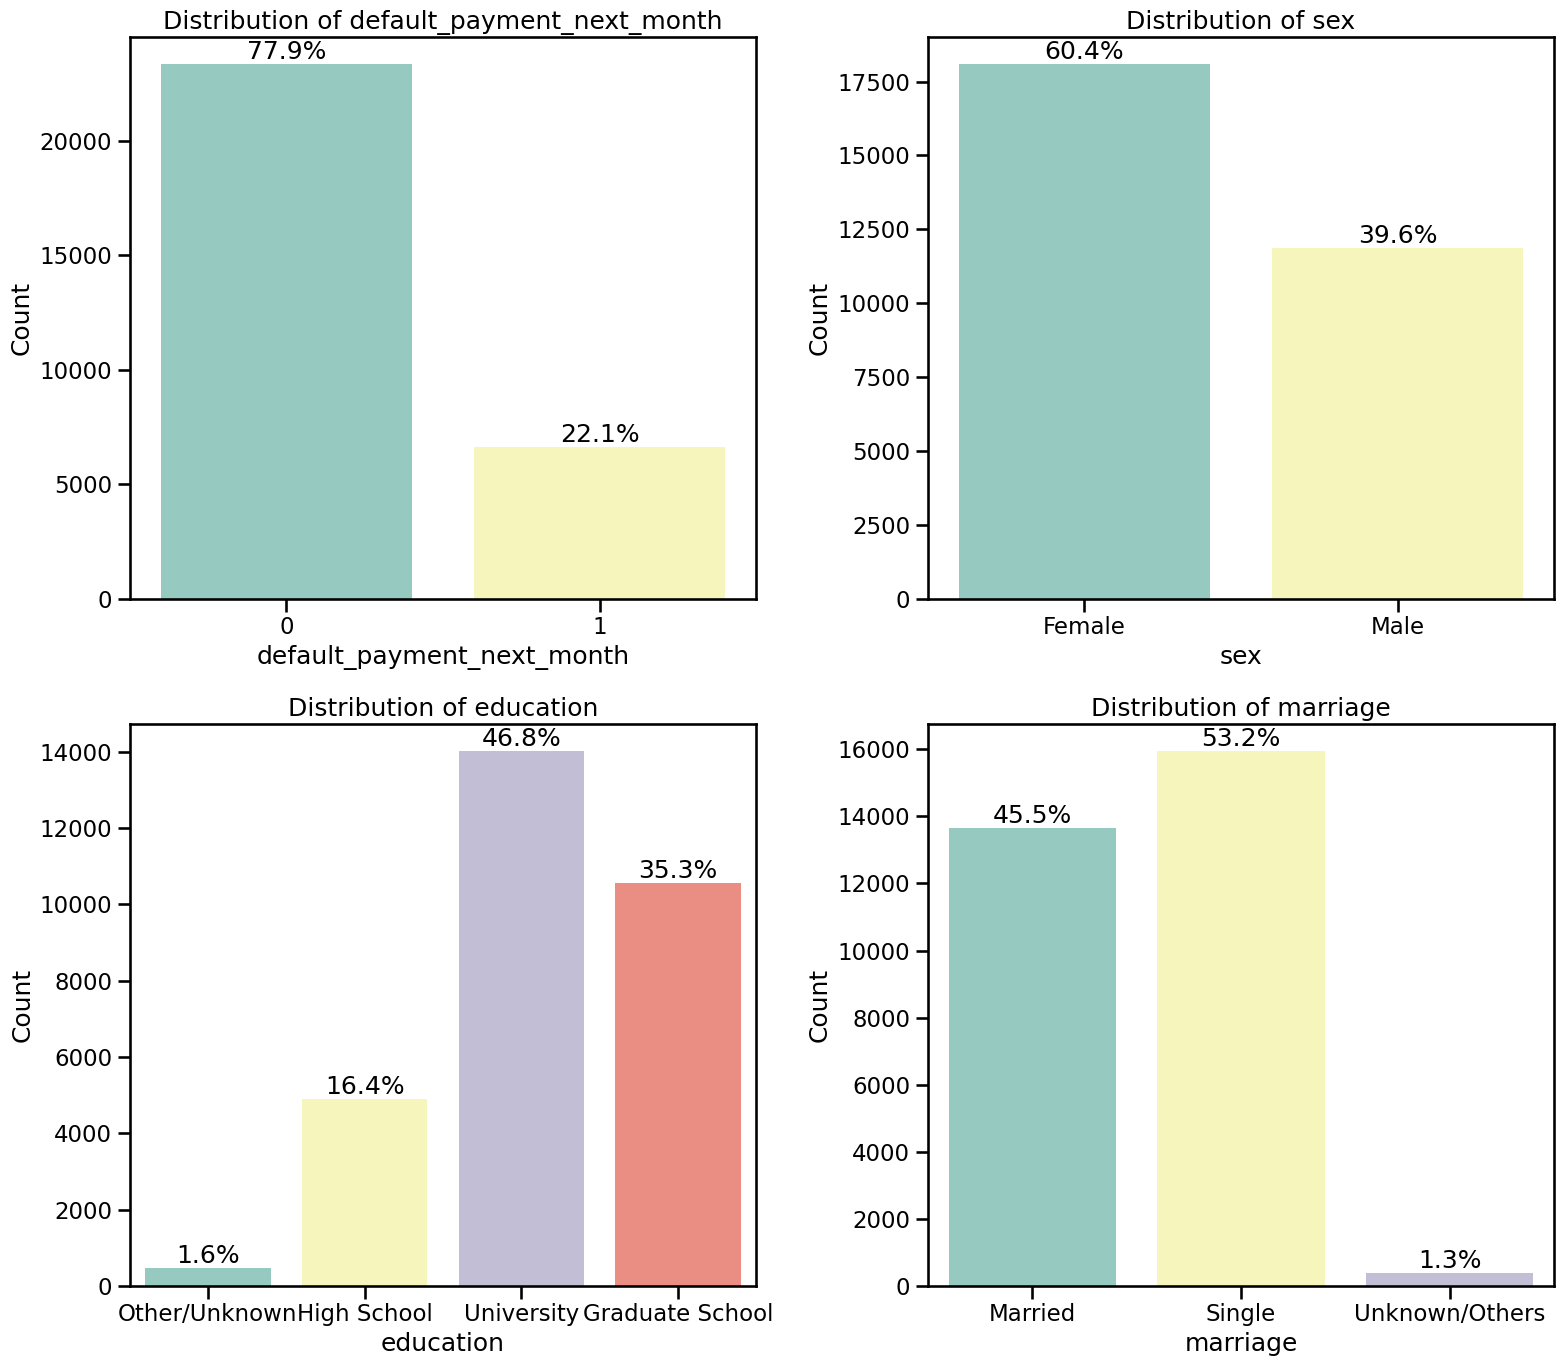

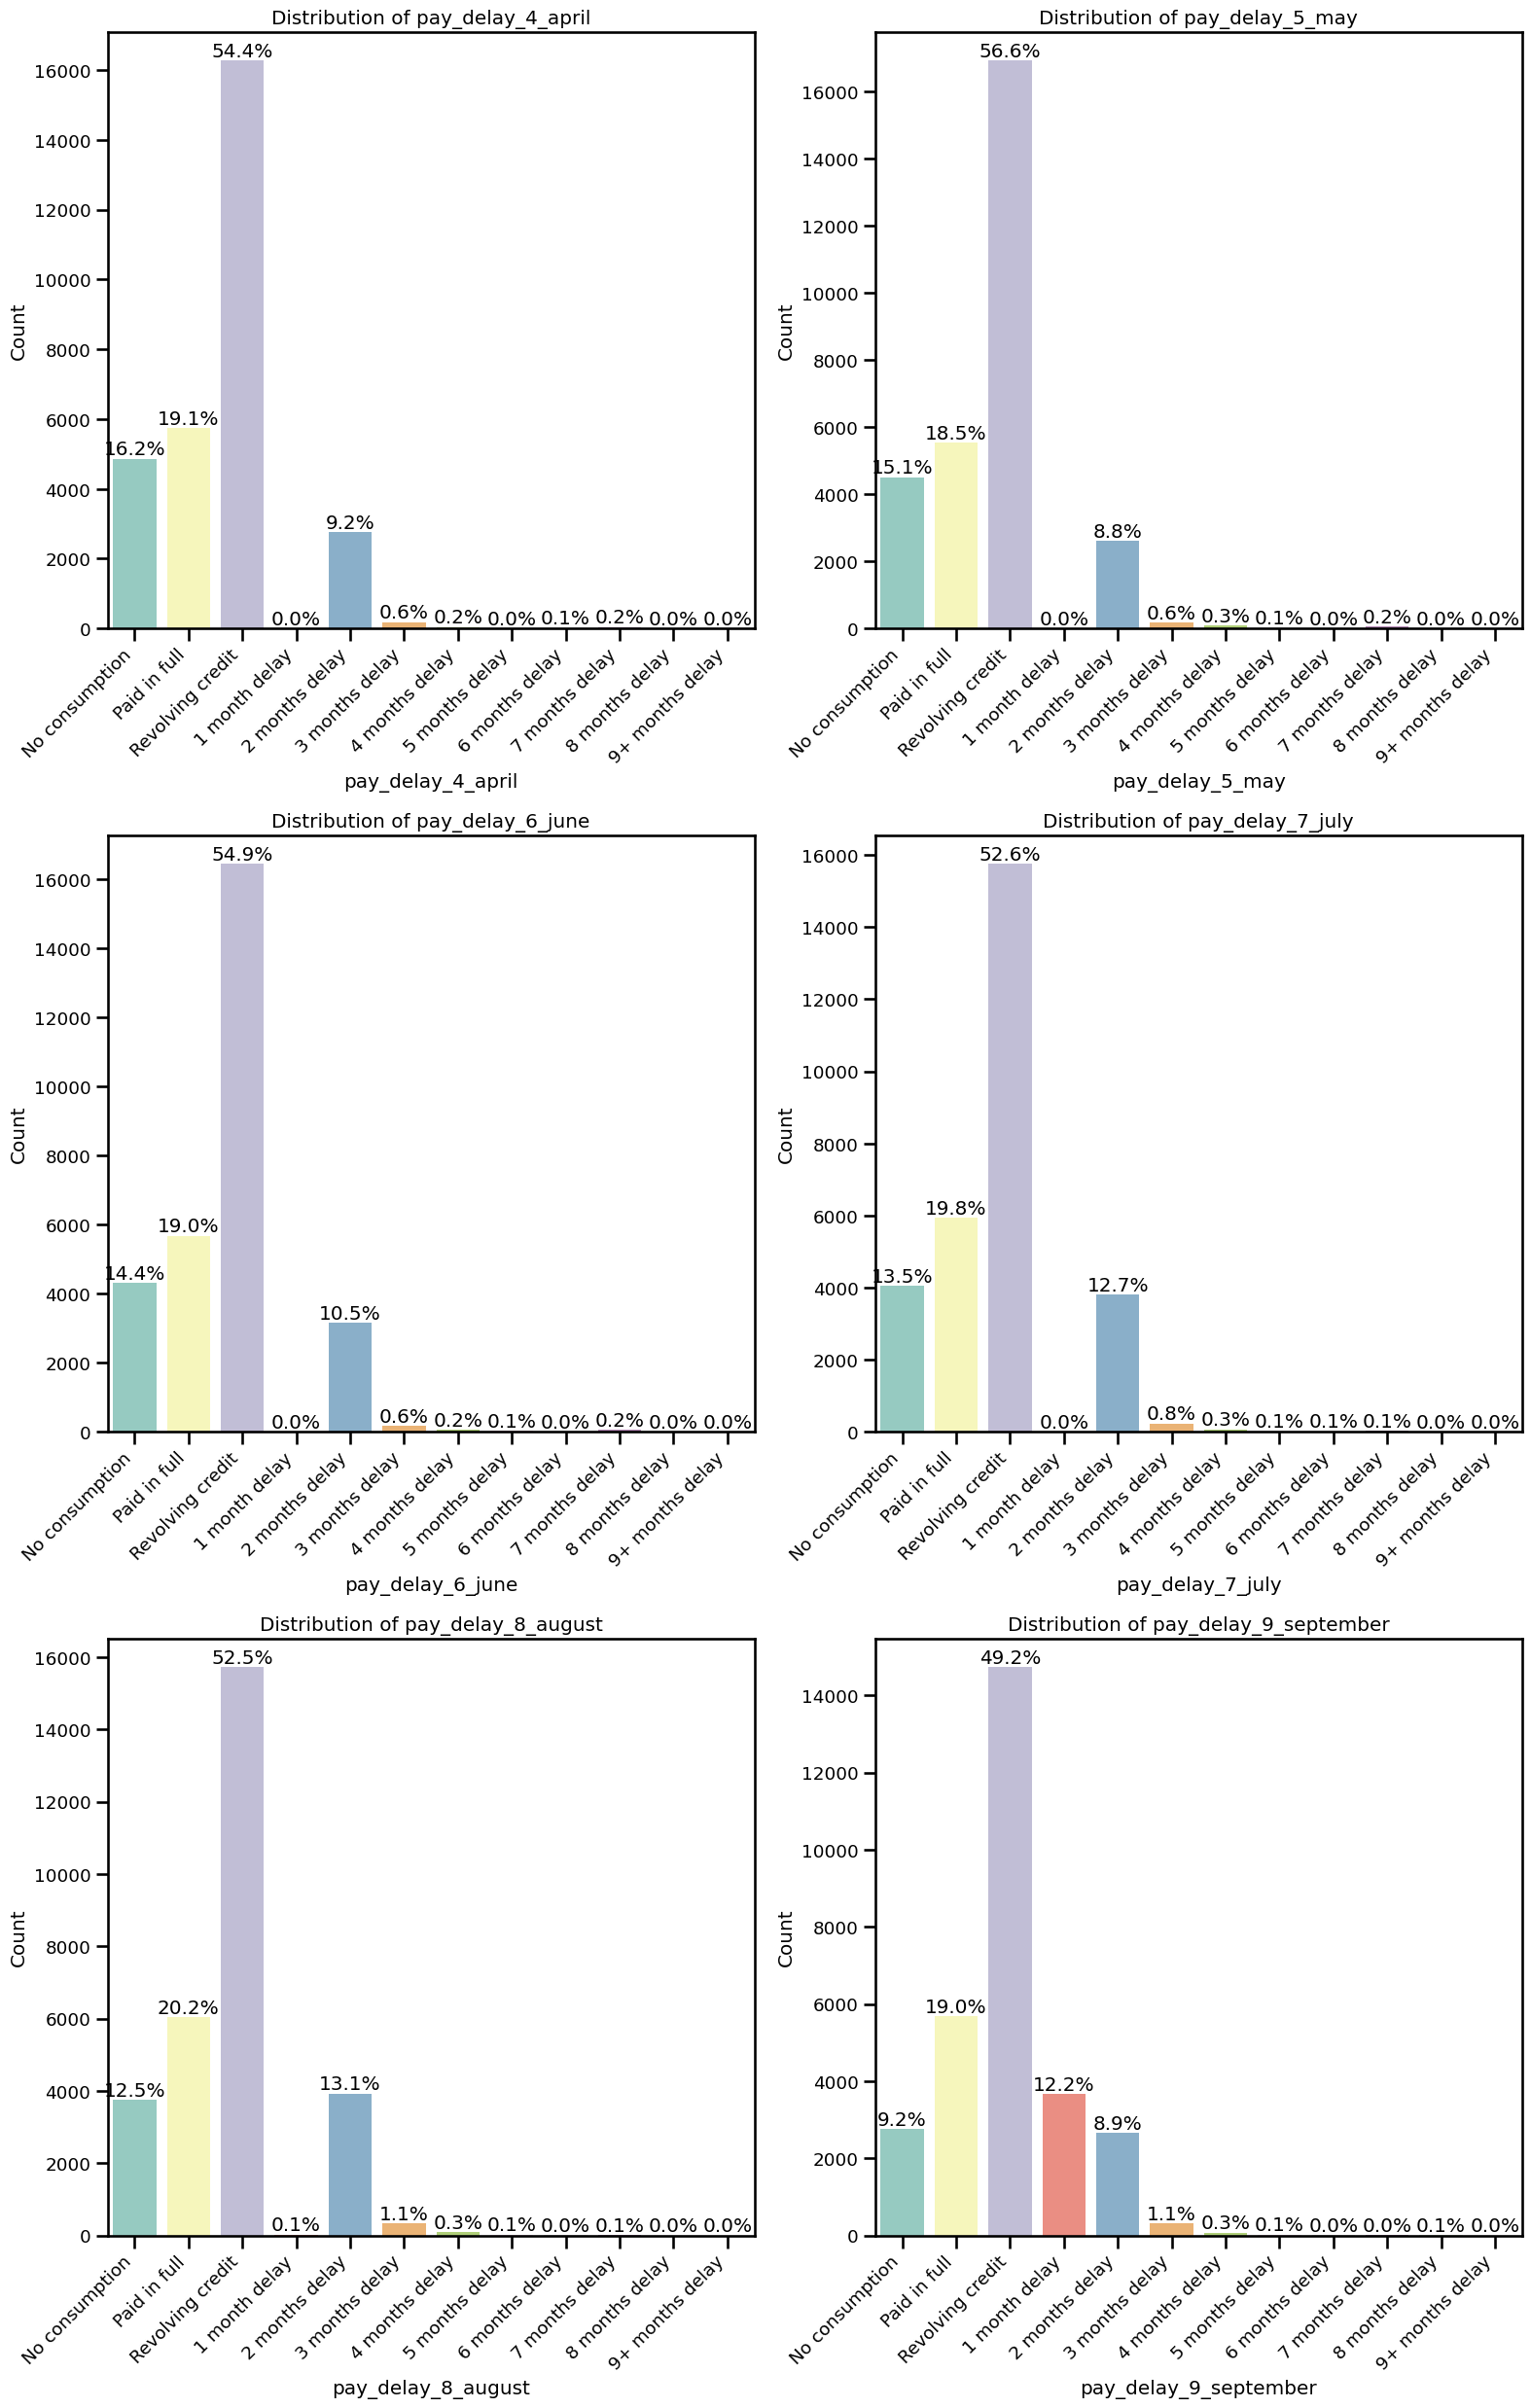

In [ ]:
from categorical_data_utils import categorical_columns, ordinal_columns, plot_categorical_distributions

# Run the plotting functions
plot_categorical_distributions(df, categorical_columns)
plot_ordinal_distributions(df, ordinal_columns)

### Cross-Feature Analysis Strategy

Cross-feature analysis aims to uncover relationships between different features and how they interact with the target variable (`default_payment_next_month`). Here’s a strategy to systematically explore these relationships:

### 1. **Correlation Analysis for Numerical Features**
   - **Pairwise Correlation**: Calculate pairwise correlations between numerical features to identify potential multicollinearity or strong associations.
   - **Correlation with Target**: Specifically, examine how each numerical feature correlates with the target variable. This will help identify features that are most predictive of loan default.

### 2. **Interaction Analysis between Categorical Features**
   - **Cross-Tabulation**: Use cross-tabulations to explore the interaction between pairs of categorical features. This can help identify combinations of categories that may be associated with higher or lower risks of default.
   - **Chi-Square Test**: Apply the chi-square test to evaluate the significance of the interactions between categorical features and the target variable. This will reveal if the combinations of categories have a statistically significant impact on loan default.

### 3. **Numerical vs. Categorical Interactions**
   - **Boxplots/Violin Plots**: For each numerical feature, create boxplots or violin plots segmented by different categorical features (like `sex`, `education`, `marriage`) to see how the distribution of numerical values changes across categories.
   - **ANOVA/Kruskal-Wallis Test**: Conduct an ANOVA (for normally distributed data) or Kruskal-Wallis test (for non-normal data) to assess whether the means of the numerical features differ significantly across different categories.

### 4. **Creating Interaction Features**
   - **Ratios and Differences**: Create new features that capture interactions between numerical features (e.g., ratios between `bill_amt` and `pay_amt` or differences between consecutive months).
   - **Combined Categorical Features**: Combine categories from different categorical features to create new interaction categories (e.g., combining `sex` and `education` to create a `sex_education` feature).

### 5. **Target-Based Feature Engineering**
   - **Mean Encoding**: Encode categorical features based on the mean target value within each category. This method helps capture the relationship between categories and the likelihood of default.
   - **Binning**: For numerical features, bin the values into categories (e.g., low, medium, high) and analyze their interaction with the target.

### 6. **Advanced Techniques**
   - **Decision Trees for Interaction Detection**: Use decision trees to identify non-linear interactions between features. The tree structure can reveal how different features split the data to predict the target variable.
   - **Feature Importance Analysis**: Use tree-based models like Random Forest or Gradient Boosting to assess feature importance, which can highlight the most relevant features and interactions.

### Implementation Outline:
1. **Data Preparation**:
   - Ensure the data is clean, and categorical features are properly encoded or labeled.
   - Split the data into training and test sets to avoid data leakage during analysis.

2. **Exploratory Data Analysis (EDA)**:
   - Visualize distributions, correlations, and interactions using plots and statistical tests.
   - Identify potential features for further engineering based on the insights from EDA.

3. **Feature Engineering**:
   - Create new features based on the interactions identified.
   - Test the new features by incorporating them into your machine learning model and evaluating the impact on performance.

4. **Modeling and Evaluation**:
   - Build models using the engineered features and compare performance metrics (like precision, recall, F1-score) to assess the contribution of the new features.
   - Fine-tune and iterate based on model performance.






### 1. **Correlation Analysis for Numerical Features**
   - **Pairwise Correlation**: Calculate pairwise correlations between numerical features to identify potential multicollinearity or strong associations.
   - **Correlation with Target**: Specifically, examine how each numerical feature correlates with the target variable. This will help identify features that are most predictive of loan default.

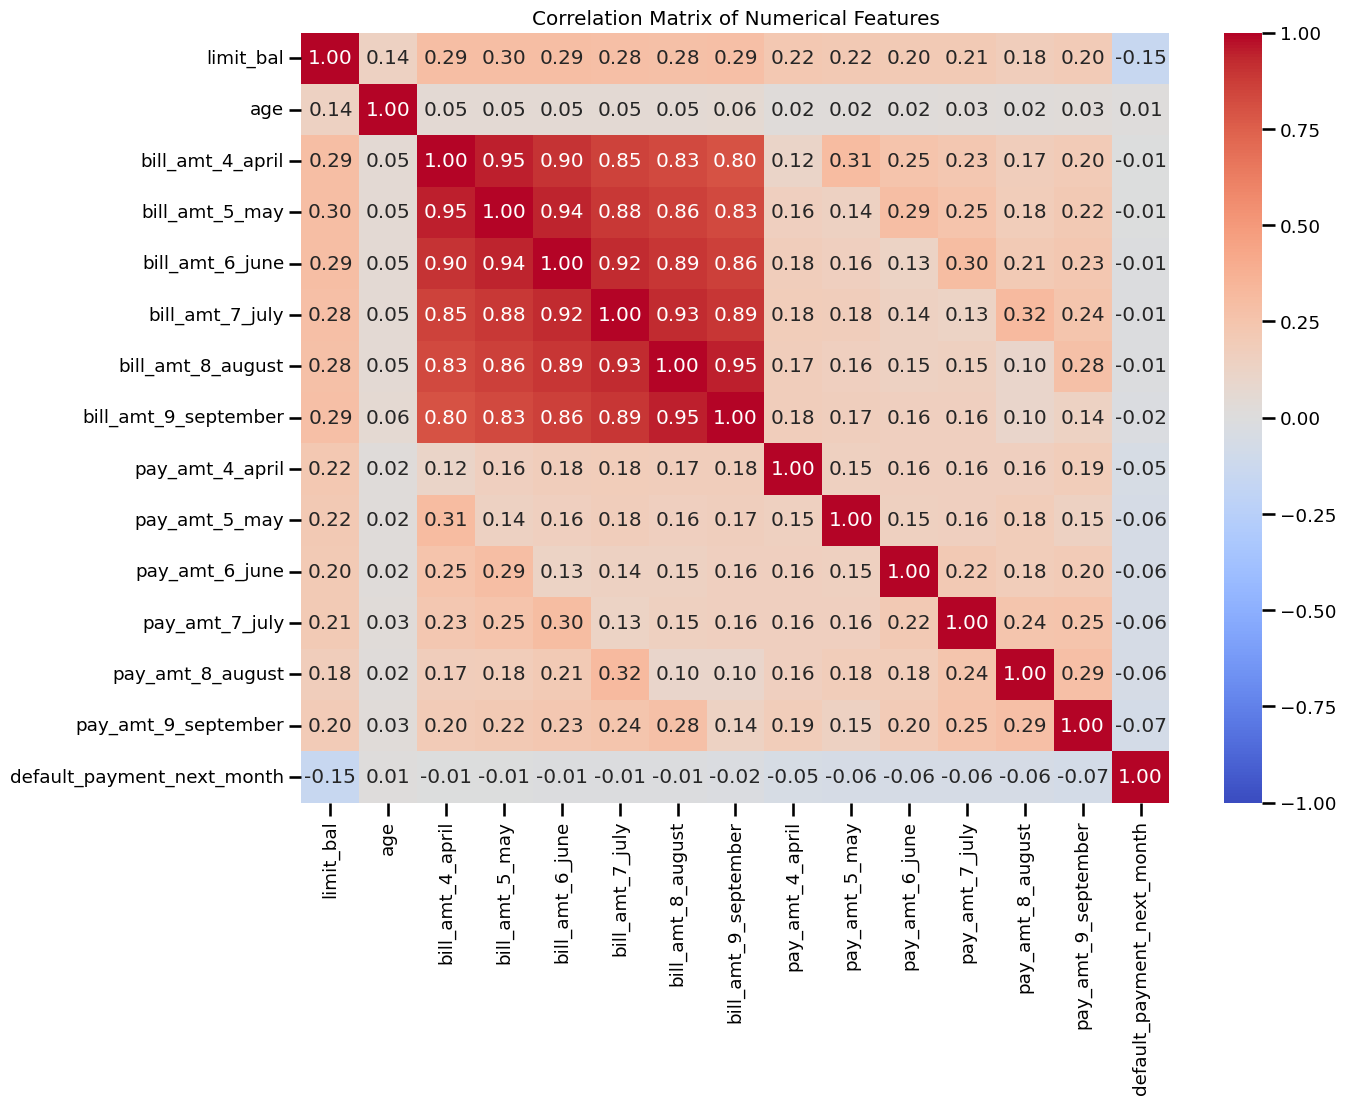

In [ ]:
# Convert the target to numerical for correlation analysis
df['default_payment_next_month'] = df['default_payment_next_month'].cat.codes

# List of numerical features
numerical_features = [
    'limit_bal', 'age',
    'bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june',
    'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september',
    'pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
    'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september'
]

# Calculate correlation matrix
correlation_matrix = df[numerical_features + ['default_payment_next_month']].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
# List of indices you want to select
selected_indices = [
    'bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june',
    'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september'
]

# Select the rows corresponding to these indices
selected_rows = correlation_matrix[correlation_matrix.index.isin(selected_indices)]

selected_rows[['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
    'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']]

,pay_amt_4_april,pay_amt_5_may,pay_amt_6_june,pay_amt_7_july,pay_amt_8_august,pay_amt_9_september
bill_amt_4_april,0.115309,0.307587,0.250082,0.233617,0.172519,0.199772
bill_amt_5_may,0.164011,0.141380,0.292975,0.252156,0.181104,0.216840
bill_amt_6_june,0.177466,0.160242,0.129995,0.299887,0.207427,0.232824
bill_amt_7_july,0.182155,0.179526,0.143211,0.129822,0.316832,0.244150
bill_amt_8_august,0.174080,0.157761,0.147203,0.150532,0.100679,0.280190
bill_amt_9_september,0.179166,0.166832,0.158110,0.156702,0.099181,0.140053


#### Low Correlation of Bill to Payments

The observation that the bill amount and payment amount for each month are not highly correlated can be surprising, but there are a few potential reasons for this:

### 1. **Partial Payments and Minimum Payments**:
   - **Minimum Payments**: Many credit accounts require only a minimum payment each month. Customers might choose to pay just the minimum amount rather than the full bill amount, leading to a low correlation between the bill amount and the payment.
   - **Partial Payments**: Customers may make partial payments that do not directly reflect the total bill amount, especially if they are revolving credit users who carry a balance from month to month.

### 2. **Revolving Credit**:
   - **Carrying Balances**: If customers carry balances over from previous months, the bill amount might include previous unpaid balances. The current payment may only cover a fraction of this, especially if the customer is trying to avoid further penalties or interest.

### 3. **Timing of Payments**:
   - **Payment Timing**: Payments might not align perfectly with the billing cycle. A customer might make a large payment after the bill for a month is generated, affecting the correlation with the bill amount for that month.
   - **Multiple Payments**: Customers might make multiple payments throughout a billing cycle, some of which could apply to earlier or later months.

### 4. **Irregular Spending and Payments**:
   - **Variable Spending**: Customers' spending patterns might vary month to month, leading to fluctuations in the bill amount that are not directly matched by their payment behavior.
   - **Irregular Income**: Customers with irregular income might pay varying amounts each month, independent of the bill amount.

### 5. **Interest and Fees**:
   - **Interest Charges**: If the bill amount includes interest or fees from previous months, this could inflate the bill without a corresponding increase in the payment amount.
   - **Late Fees**: Additional fees could also contribute to a higher bill amount without reflecting a corresponding increase in payments.

### 6. **Behavioral Factors**:
   - **Strategic Payment Behavior**: Some customers may strategically make lower payments to manage cash flow or prioritize other expenses, leading to a disconnect between the bill and payment amounts.
   - **Financial Stress**: Customers under financial stress might be making minimal payments, regardless of the bill amount, leading to low correlations.

### Conclusion:
The relatively low correlation between bill amounts and payments likely reflects a combination of these factors. Understanding these patterns could be valuable in feature engineering, such as by creating features that capture the difference between the bill and payment amounts or features that account for the payment behavior over time.

If you'd like, we can explore further by analyzing the differences between bill amounts and payments or look into creating additional features based on these insights.

### 2. **Interaction Analysis between Categorical Features**
   - **Cross-Tabulation**: Use cross-tabulations to explore the interaction between pairs of categorical features. This can help identify combinations of categories that may be associated with higher or lower risks of default.
   - **Chi-Square Test**: Apply the chi-square test to evaluate the significance of the interactions between categorical features and the target variable. This will reveal if the combinations of categories have a statistically significant impact on loan default.


The chi-square test is a statistical method used to determine whether there is a significant association between two categorical variables. In the context of your analysis, the chi-square test helps evaluate whether the distribution of loan defaults (`default_payment_next_month`) is dependent on the categories of another categorical feature (e.g., `sex`, `education`, `marriage`, etc.).

### How the Chi-Square Test Works:

1. **Hypotheses**:
   - **Null Hypothesis (H₀)**: There is no association between the categorical feature and the target variable. This means the distribution of the target variable (loan default) is independent of the categories in the feature.
   - **Alternative Hypothesis (H₁)**: There is an association between the categorical feature and the target variable. This means the distribution of the target variable is dependent on the categories in the feature.

2. **Contingency Table**:
   - The test starts by constructing a contingency table, which is a matrix that displays the frequency counts of the combinations of categories between the two variables being tested. For example, one axis might represent the categories of `education`, and the other axis represents the two classes in `default_payment_next_month` (default or no default).

3. **Expected Frequencies**:
   - For each cell in the contingency table, the test calculates the expected frequency under the assumption that the null hypothesis is true. This expected frequency is based on the assumption that the variables are independent.

4. **Chi-Square Statistic**:
   - The chi-square statistic measures the difference between the observed frequencies (from the actual data) and the expected frequencies (calculated under the null hypothesis).
   - This formula sums the squared differences between observed and expected frequencies, normalized by the expected frequency, across all cells in the contingency table.

5. **Degrees of Freedom**:
   - The degrees of freedom (df) for the chi-square test are calculated based on the number of categories in each variable:

6. **P-Value**:
   - The chi-square statistic is then compared to a chi-square distribution with the calculated degrees of freedom to obtain a p-value.
   - The p-value indicates the probability of observing a chi-square statistic as extreme as the one calculated, under the assumption that the null hypothesis is true.
   - A small p-value (typically < 0.05) suggests that the observed distribution is significantly different from the expected distribution, leading to the rejection of the null hypothesis in favor of the alternative hypothesis.

### Interpretation:
- **Significant Result (p < 0.05)**: If the p-value is less than the chosen significance level (usually 0.05), it suggests that there is a statistically significant association between the categorical feature and the target variable. This means the distribution of loan defaults varies depending on the categories of the feature.
- **Non-Significant Result (p ≥ 0.05)**: If the p-value is greater than or equal to the significance level, it suggests that there is no significant association, and the target variable is likely independent of the feature's categories.

### Example in Context:
If you perform a chi-square test between `education` and `default_payment_next_month` and obtain a p-value of 0.01, you would conclude that the level of education is significantly associated with loan default, meaning the likelihood of default differs across education levels.

This test is particularly useful in your dataset because it helps you identify which categorical features have a meaningful relationship with loan defaults, guiding further feature engineering or model selection.


In [ ]:
df['default_payment_next_month'].value_counts()

,count
default_payment_next_month,
0,23335
1,6630


In [ ]:
def convert_default_payment_status(df):
    """Convert the target variable to 'default' and 'no default' categories."""
    df['default_payment_next_month'] = df['default_payment_next_month'].map({0: 'no default', 1: 'default'})
    # Ensure 'default' is at the top by setting category order
    df['default_payment_next_month'] = pd.Categorical(df['default_payment_next_month'], categories=['no default', 'default'], ordered=True)
    return df

df = convert_default_payment_status(df)
df['default_payment_next_month'].value_counts()

,count
default_payment_next_month,
no default,23335
default,6630



Chi-Square Test for sex vs. Default Payment Next Month
Chi2: 47.1311, p-value: 0.0000
default_payment_next_month  no default  default
sex                                            
Female                           14330     3761
Male                              9005     2869


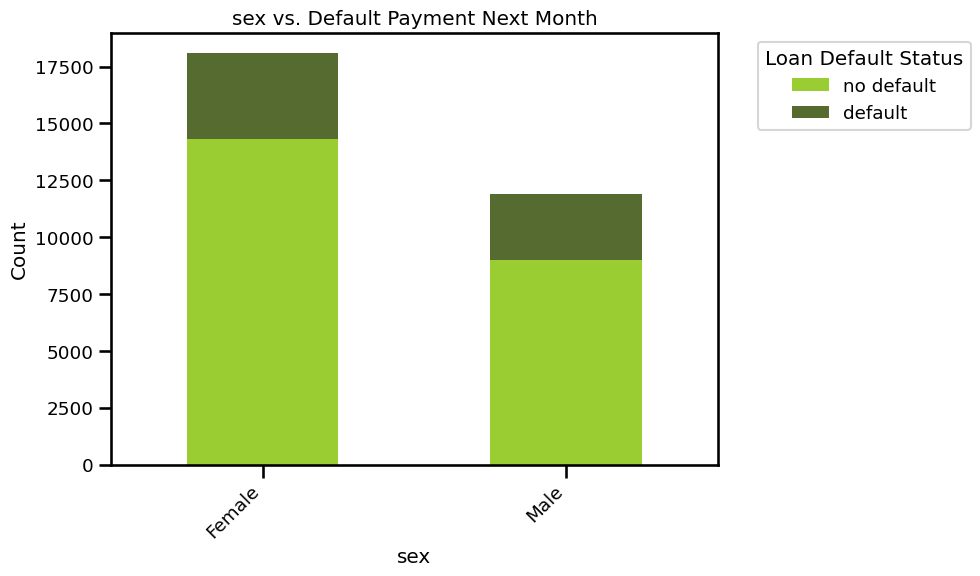


Chi-Square Test for education vs. Default Payment Next Month
Chi2: 160.4603, p-value: 0.0000
default_payment_next_month  no default  default
education                                      
Other/Unknown                      435       33
High School                       3678     1237
University                       10691     3328
Graduate School                   8531     2032


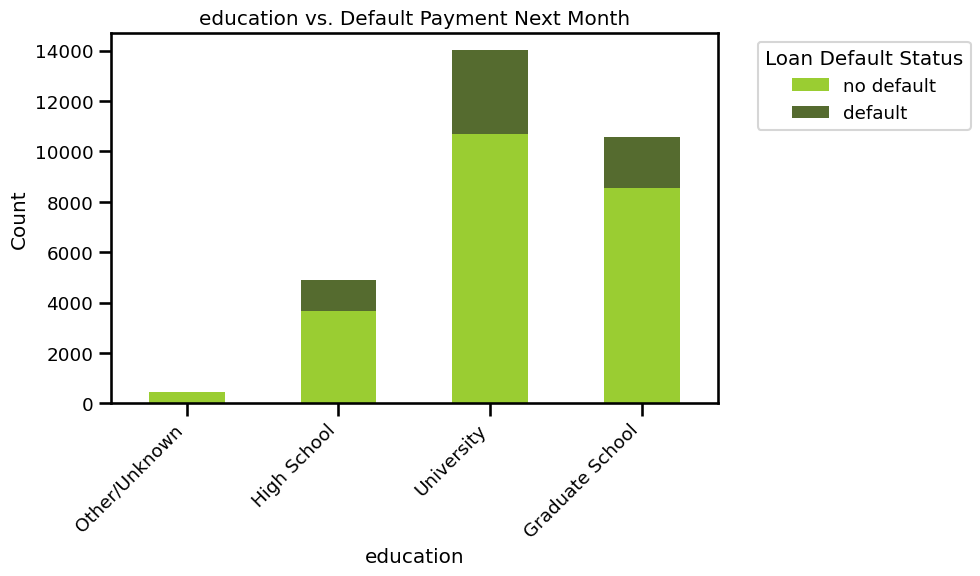


Chi-Square Test for marriage vs. Default Payment Next Month
Chi2: 27.4887, p-value: 0.0000
default_payment_next_month  no default  default
marriage                                       
Married                          10442     3201
Single                           12605     3340
Unknown/Others                     288       89


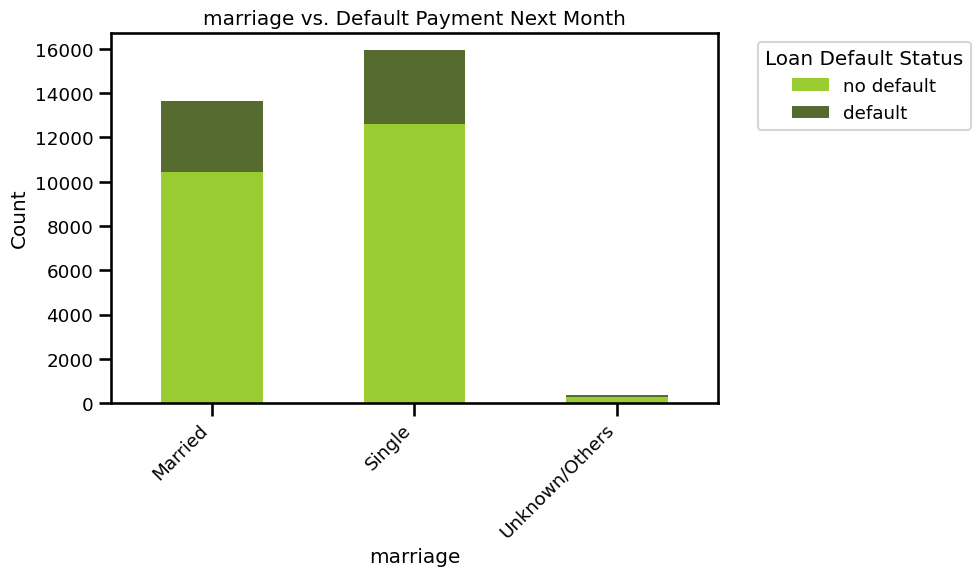


Chi-Square Test for pay_delay_4_april vs. Default Payment Next Month
Chi2: 1882.9752, p-value: 0.0000
default_payment_next_month  no default  default
pay_delay_4_april                              
No consumption                    3889      976
Paid in full                      4761      975
Revolving credit                 13217     3069
2 months delay                    1365     1401
3 months delay                      66      118
4 months delay                      18       30
5 months delay                       6        7
6 months delay                       5       14
7 months delay                       8       38
8 months delay                       0        2


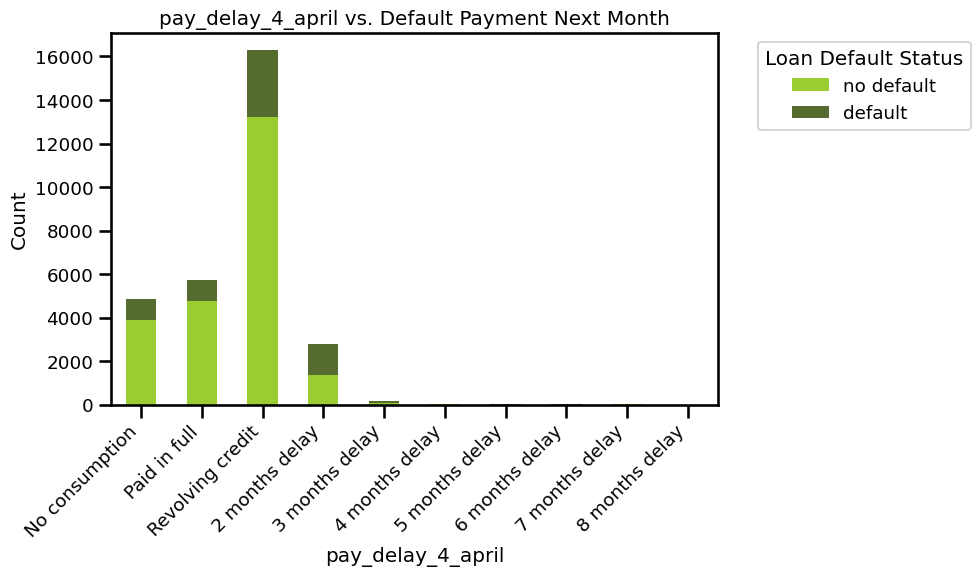


Chi-Square Test for pay_delay_5_may vs. Default Payment Next Month
Chi2: 2193.7828, p-value: 0.0000
default_payment_next_month  no default  default
pay_delay_5_may                                
No consumption                    3626      890
Paid in full                      4638      897
Revolving credit                 13752     3195
2 months delay                    1203     1423
3 months delay                      65      113
4 months delay                      33       50
5 months delay                       7       10
6 months delay                       1        3
7 months delay                      10       48
8 months delay                       0        1


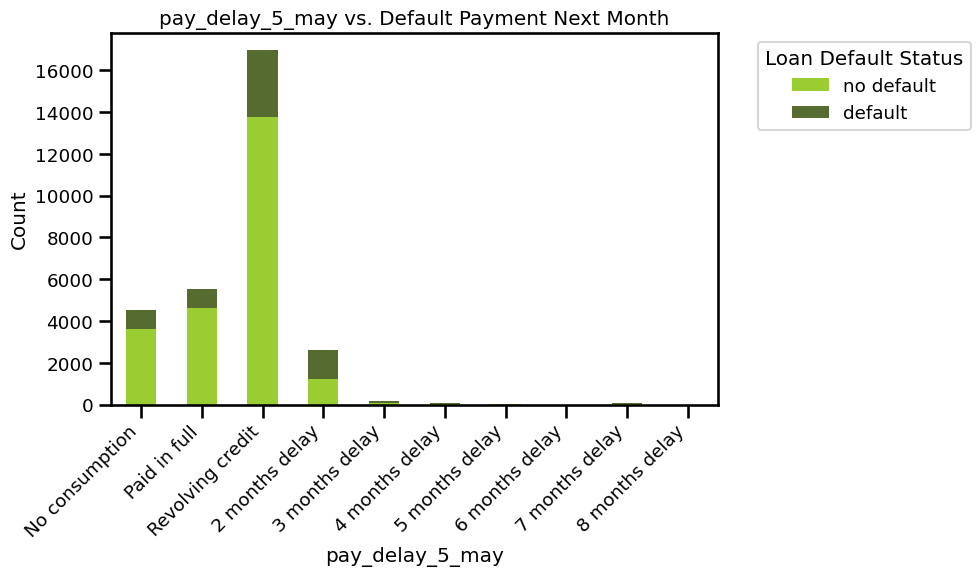


Chi-Square Test for pay_delay_6_june vs. Default Payment Next Month
Chi2: 2337.2135, p-value: 0.0000
default_payment_next_month  no default  default
pay_delay_6_june                               
No consumption                    3486      832
Paid in full                      4779      904
Revolving credit                 13439     3016
1 month delay                        1        1
2 months delay                    1506     1653
3 months delay                      70      110
4 months delay                      23       45
5 months delay                      17       18
6 months delay                       3        2
7 months delay                      10       48
8 months delay                       1        1


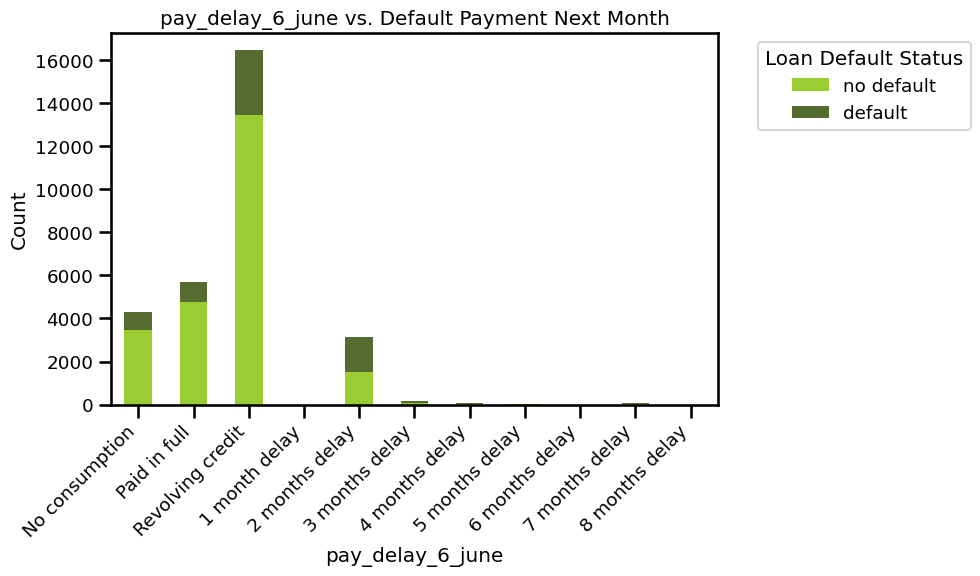


Chi-Square Test for pay_delay_7_july vs. Default Payment Next Month
Chi2: 2618.4630, p-value: 0.0000
default_payment_next_month  no default  default
pay_delay_7_july                               
No consumption                    3303      752
Paid in full                      5008      926
Revolving credit                 13013     2751
1 month delay                        3        1
2 months delay                    1850     1969
3 months delay                     102      138
4 months delay                      32       43
5 months delay                       9       12
6 months delay                       9       14
7 months delay                       5       22
8 months delay                       1        2


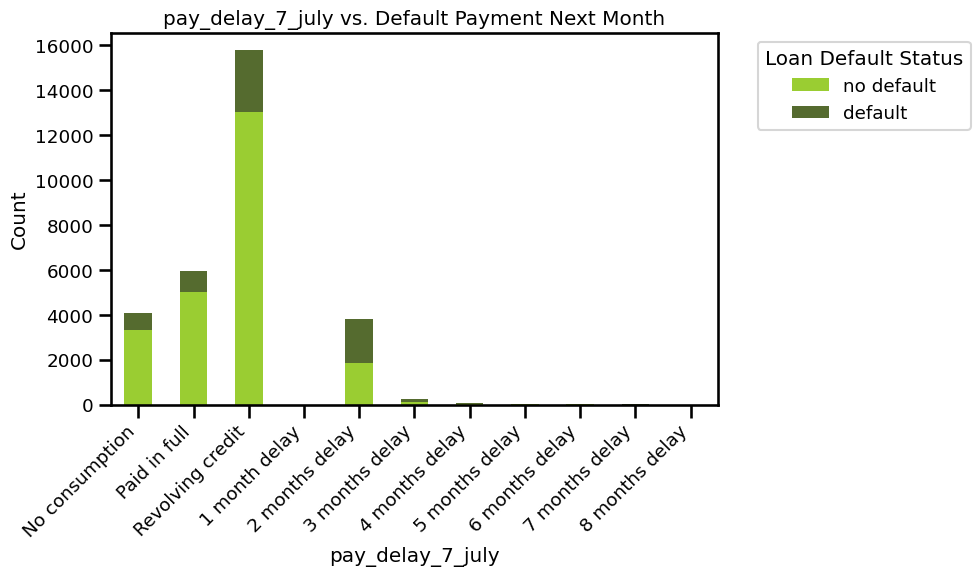


Chi-Square Test for pay_delay_8_august vs. Default Payment Next Month
Chi2: 3470.4198, p-value: 0.0000
default_payment_next_month  no default  default
pay_delay_8_august                             
No consumption                    3066      686
Paid in full                      5080      966
Revolving credit                 13227     2503
1 month delay                       23        5
2 months delay                    1743     2183
3 months delay                     125      201
4 months delay                      49       50
5 months delay                      10       15
6 months delay                       3        9
7 months delay                       8       12
8 months delay                       1        0


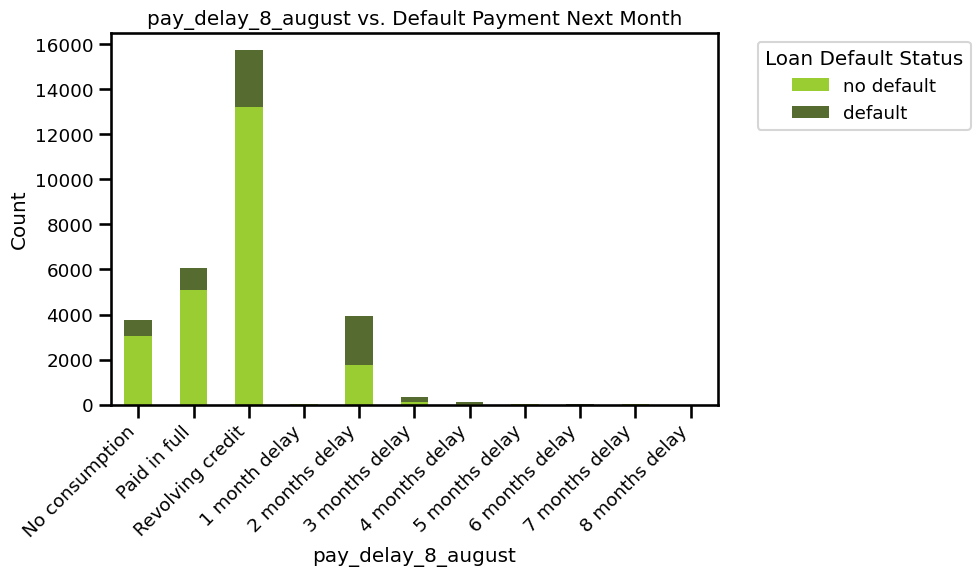


Chi-Square Test for pay_delay_9_september vs. Default Payment Next Month
Chi2: 5363.5026, p-value: 0.0000
default_payment_next_month  no default  default
pay_delay_9_september                          
No consumption                    2386      364
Paid in full                      4728      954
Revolving credit                 12849     1888
1 month delay                     2419     1248
2 months delay                     823     1843
3 months delay                      78      244
4 months delay                      24       52
5 months delay                      13       13
6 months delay                       5        6
7 months delay                       2        7
8 months delay                       8       11


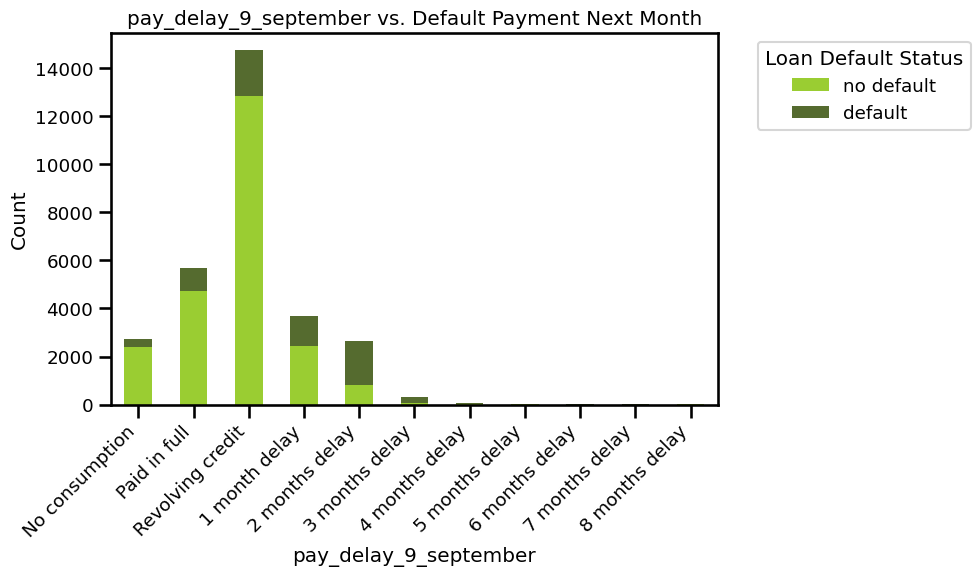

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

def plot_chi_square_with_customizations(df, categorical_features):
    """Perform chi-square test and plot results with customizations."""

    # Define custom colors
    colors = ['yellowgreen', 'darkolivegreen']  # light green for 'no default', dark green for 'default'

    for feature in categorical_features:
        crosstab = pd.crosstab(df[feature], df['default_payment_next_month'])
        chi2, p, dof, ex = chi2_contingency(crosstab)
        print(f"\nChi-Square Test for {feature} vs. Default Payment Next Month")
        print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}")
        print(crosstab)

        # Plot the cross-tabulation with a wider figure
        # plt.figure(figsize=(12, 6))  # Adjust the width (12) and height (6) as needed
        ax = crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(12,6))
        plt.title(f'{feature} vs. Default Payment Next Month')
        plt.ylabel('Count')
        plt.xlabel(feature)
        plt.xticks(rotation=45, ha='right')

        # Move the legend outside the plot
        plt.legend(title='Loan Default Status', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['no default', 'default'])

        # Adjust layout to make room for the legend
        plt.tight_layout(rect=[0, 0, 0.85, 1])

        plt.show()

# List of categorical features
categorical_features = [
    'sex', 'education', 'marriage',
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]

# Apply the function to plot with customizations
plot_chi_square_with_customizations(df, categorical_features)


The interpretation of the p-value in a chi-square test is a bit different. Here’s how to understand the result:

#### Understanding the Result:
- **Chi-Square Test for `sex` vs. `Default Payment Next Month`**:
  - **Chi2**: 47.1311
  - **p-value**: 0.0000

### Interpretation:
- **p-value**: The p-value is the probability of observing a chi-square statistic as extreme as the one calculated, assuming that the null hypothesis is true. In this context, the null hypothesis is that there is no association between `sex` and `default_payment_next_month` (i.e., the distribution of loan defaults is independent of gender).

- **Low p-value (< 0.05)**: A p-value of 0.0000 indicates that the result is statistically significant. This means that there is strong evidence to reject the null hypothesis. In other words, the data suggests that there **is** a significant association between `sex` and `default_payment_next_month`.

### Conclusion:
- **Relationship Exists**: Since the p-value is much less than 0.05, there is a statistically significant relationship between `sex` and loan default status. The distribution of loan defaults varies by gender.

### General Rule:
- **p-value < 0.05**: Reject the null hypothesis, indicating that there is a significant association between the variables.
- **p-value ≥ 0.05**: Fail to reject the null hypothesis, indicating that there is no significant association between the variables.

In your specific case, because the p-value is 0.0000, you can conclude that `sex` is significantly associated with whether someone defaults on a loan.

Would you like to explore or discuss the results for other features?

### Chi-Square Results Table

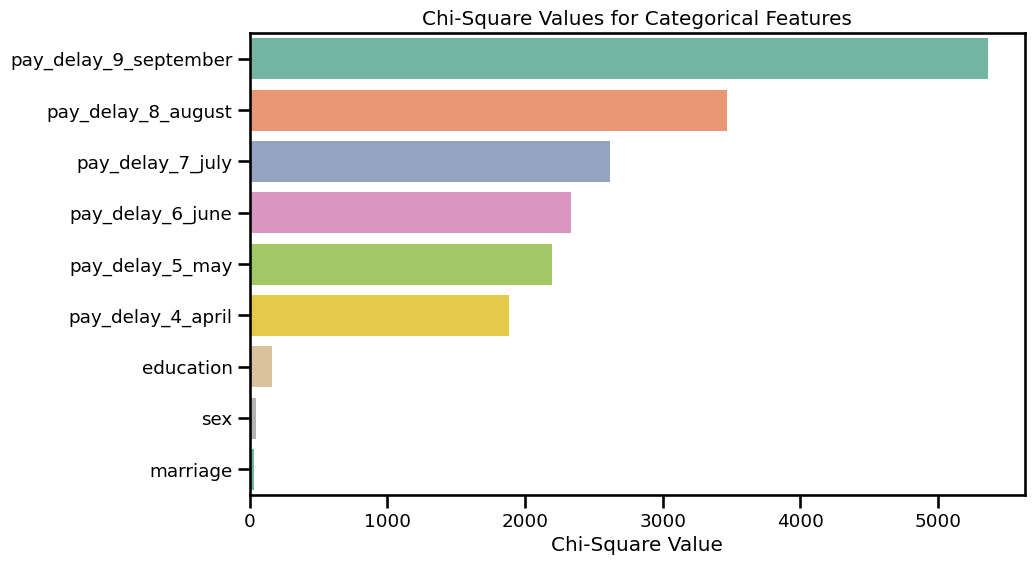

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

def perform_chi_square_tests(df, categorical_features):
    """Perform chi-square tests for categorical features against the target and return a sorted dataframe."""

    results = []

    for feature in categorical_features:
        crosstab = pd.crosstab(df[feature], df['default_payment_next_month'])
        chi2, p, dof, ex = chi2_contingency(crosstab)
        results.append({
            'Feature': feature,
            'Chi2': chi2,
            'p-value': p,
            'Degrees of Freedom': dof
        })

    # Convert the results to a dataframe
    results_df = pd.DataFrame(results)

    # Sort the dataframe by p-value (ascending order)
    sorted_results_df = results_df.sort_values(by='Chi2',ascending=False).reset_index(drop=True)

    return sorted_results_df

# List of categorical features
categorical_features = [
    'sex', 'education', 'marriage',
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]

# Perform chi-square tests and get the results
chi_square_results = perform_chi_square_tests(df, categorical_features)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi2', y='Feature', data=chi_square_results, hue='Feature', palette='Set2')
plt.title('Chi-Square Values for Categorical Features')
plt.xlabel('Chi-Square Value')
plt.ylabel('')
plt.show()


# # Display the results
# print(chi_square_results)




### 1. **Statistical Significance**:
- **p-value Interpretation**:
  - All the p-values are extremely low (well below 0.05), which indicates that for each categorical feature, the null hypothesis (that there is no association between the feature and loan defaults) can be rejected.
  - This means there is a statistically significant association between each of these features and the likelihood of loan default.

### 2. **Chi-Square Values**:
- The chi-square statistic (`Chi2`) reflects the strength of the association. Larger chi-square values indicate a stronger association between the feature and the target variable.

### 3. **Interpreting Specific Results**:
- **Payment Delays (`pay_delay_*`)**:
  - The payment delay features (`pay_delay_4_april` through `pay_delay_9_september`) have very high chi-square values, suggesting a strong relationship with loan defaults. This makes intuitive sense because delays in payments are likely to be strongly linked to the likelihood of default.
  - The increasing trend in chi-square values from April to September might indicate that more recent payment delays have a stronger association with defaulting, possibly because they reflect more immediate financial stress.

- **Education**:
  - The `education` feature has a significant chi-square value (160.46) with a p-value of `1.458089e-34`, indicating that education level is also significantly associated with the likelihood of default. Different education levels might reflect different levels of financial literacy or earning potential, which can influence default risk.

- **Sex**:
  - The `sex` feature has a chi-square value of `47.13` and a p-value of `6.639289e-12`, showing that gender is significantly associated with loan default, although the strength of this association is weaker compared to payment delays.

- **Marriage**:
  - The `marriage` feature, with a chi-square value of `27.49` and a p-value of `1.073732e-06`, also shows a significant relationship with loan default. Marital status might influence financial stability, and different categories here might have different risk profiles.

### 4. **Degrees of Freedom**:
- The degrees of freedom (dof) depend on the number of categories in each feature:
  - **More Categories**: Features with more categories (like the payment delay features) have higher degrees of freedom.
  - **Fewer Categories**: Features like `sex` have lower degrees of freedom since they have fewer categories.

### Conclusion:
- **All Features Are Significant**: All the features you tested have a statistically significant relationship with loan defaults. This means they all contribute to distinguishing between those who default and those who don’t.
- **Stronger Associations**: Features like `pay_delay_9_september` have the strongest associations (indicated by the highest chi-square values), suggesting they might be particularly predictive of defaults.

### Next Steps:
- **Feature Importance**: Given these results, you might prioritize payment delay features in your modeling, as they show the strongest relationship with the target variable.
- **Further Analysis**: You could also explore interactions between these features or create new features based on these insights to potentially improve your model's performance.


### Interaction Features

Based on the insights from your chi-square analysis, you can explore several types of interaction features that might help improve your model’s performance. Here are some ideas:

### 1. **Interaction Between Payment Delays**
   - **Pairwise Interactions**: Create new features that represent the interaction between two payment delay columns. For example, you could multiply or combine delay features to capture compounded delay risks.
   - **Example**:
     ```python
     df['pay_delay_8_august_9_september'] = df['pay_delay_8_august'].astype(str) + '_' + df['pay_delay_9_september'].astype(str)
     ```
   - **Rationale**: This could capture cases where delays in consecutive months indicate a higher risk of default.

### 2. **Combining Payment Delays into a Single Feature**
   - **Cumulative Delay Count**: Create a feature that counts the number of months with significant delays (e.g., 3 months or more) to summarize a customer’s overall payment behavior.
   - **Example**:
     ```python
     df['total_severe_delays'] = df[['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
                                     'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']].apply(
         lambda x: sum(delay in ['3 months delay', '4 months delay', '5 months delay',
                                 '6 months delay', '7 months delay', '8 months delay', '9+ months delay']
                       for delay in x), axis=1)
     ```
   - **Rationale**: A customer who has multiple severe delays across different months is likely at higher risk of default.

### 3. **Interaction Between Demographics and Payment Behavior**
   - **Education and Payment Delays**: Combine `education` levels with `pay_delay_*` features to explore whether the impact of payment delays differs across education levels.
   - **Example**:
     ```python
     df['education_pay_delay_9_september'] = df['education'].astype(str) + '_' + df['pay_delay_9_september'].astype(str)
     ```
   - **Rationale**: Education may influence financial literacy, and its interaction with payment behavior could reveal nuanced risk profiles.

### 4. **Interaction Between Demographics**
   - **Marital Status and Sex**: Combine `marriage` and `sex` to explore whether the interaction between these demographic factors has a unique impact on loan default.
   - **Example**:
     ```python
     df['sex_marriage'] = df['sex'].astype(str) + '_' + df['marriage'].astype(str)
     ```
   - **Rationale**: Certain combinations of marital status and gender might correlate with financial behaviors that affect default risk.

### 5. **Interaction Between All Delay Features**
   - **Delay Pattern**: Create a composite feature that captures a pattern across all delay features to identify customers with consistent delays.
   - **Example**:
     ```python
     df['overall_delay_pattern'] = df[['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
                                       'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']].apply(
         lambda x: '_'.join(x.astype(str)), axis=1)
     ```
   - **Rationale**: This feature could capture consistent late payments across multiple months, which might strongly predict default.

### 6. **Combining Education and Sex with Loan Amount**
   - **Normalized Loan by Demographics**: Calculate a feature that normalizes the loan amount (`limit_bal`) by different demographic features like education or sex.
   - **Example**:
     ```python
     df['normalized_loan_education'] = df['limit_bal'] / df['education'].map({'1': 1, '2': 2, '3': 3, '4': 4})
     ```
   - **Rationale**: This could help capture whether certain demographic groups are taking on disproportionately large loans, which might correlate with default risk.

### 7. **Interaction of Delay Features with Loan Amount**
   - **Weighted Delay Score**: Create a feature that weights the payment delays by the loan amount to capture the risk of higher loan balances being unpaid.
   - **Example**:
     ```python
     df['weighted_delay'] = df['total_severe_delays'] * df['limit_bal']
     ```
   - **Rationale**: High delays combined with high loan amounts could be a strong predictor of default.

### Implementation:
These interaction features can be created using simple pandas operations and then included in your model. They may help uncover complex relationships that are not evident when considering features independently.

### Next Steps:
- **Feature Engineering**: Create these interaction features and add them to your dataset.
- **Model Evaluation**: Test the impact of these features on your model’s performance, possibly using feature importance metrics to assess their contribution.

Would you like to start with a specific interaction feature, or do you need more detailed implementation guidance?

### Within Group Chi-Square Testing

Testing the individual categories within each feature against the pay delays is a more granular approach and can provide deeper insights. This approach is indeed a good idea and can help you identify which specific categories within each feature are more likely to be associated with payment delays.

### What This Approach Will Achieve:
- **Granular Insights**: By testing individual categories within features like `education`, `sex`, `marriage`, etc., against specific pay delays (e.g., `3 months delay`, `5 months delay`), you can uncover more specific patterns.
- **Targeted Analysis**: This allows you to see if certain groups (e.g., individuals with "Revolving credit" or "Paid in full" statuses) are more likely to experience certain types of payment delays, which might inform your feature engineering.

### Step-by-Step Approach:

1. **Chi-Square Test Between Individual Categories and Specific Pay Delays**:
   - Perform chi-square tests to see if individual categories within a feature (e.g., `education`, `sex`, `marriage`) are associated with specific payment delays.

2. **Setup and Execution**:
   - For each feature, test each category within that feature against the different pay delay categories.



### Analysis:
- **Interpret the Results**: For each category within your features (e.g., 'No consumption', 'Paid in full', etc.), you’ll get a p-value indicating whether that specific category has a significant association with the pay delay category being tested.
- **Focus on Low p-values**: Categories with low p-values (e.g., < 0.05) are those that have a significant relationship with the delay, suggesting that this category is more likely to be associated with that specific type of delay.

### Next Steps:
- **Iterate Through All Categories and Pay Delays**: You can extend this approach to other features and pay delay categories to build a comprehensive understanding.
- **Feature Engineering**: Use these insights to create new features or adjust existing ones, potentially improving your model’s predictive power.



In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

def perform_category_vs_pay_delay_chi_square(df, feature, delay_feature):
    """Perform chi-square tests between individual categories within a feature and specific pay delays."""

    results = []

    # Iterate through each category in the feature
    for category in df[feature].cat.categories:
        subset_df = df[df[feature] == category]

        # Create a cross-tabulation between the category and the delay feature
        crosstab = pd.crosstab(subset_df[feature], subset_df[delay_feature])

        if crosstab.size > 0:  # Only perform the test if the crosstab is not empty
            chi2, p, dof, ex = chi2_contingency(crosstab)
            results.append({
                'Category': category,
                'Feature': feature,
                'Pay Delay': delay_feature,
                'Chi2': chi2,
                'p-value': p,
                'Degrees of Freedom': dof
            })

    # Convert the results to a dataframe
    results_df = pd.DataFrame(results)

    return results_df

# Example: Testing individual categories within 'education' against 'pay_delay_9_september'
results = perform_category_vs_pay_delay_chi_square(df, 'education', 'default_payment_next_month')

# Display the results
results


,Category,Feature,Pay Delay,Chi2,p-value,Degrees of Freedom
0,Other/Unknown,education,default_payment_next_month,0.0,1.0,0
1,High School,education,default_payment_next_month,0.0,1.0,0
2,University,education,default_payment_next_month,0.0,1.0,0
3,Graduate School,education,default_payment_next_month,0.0,1.0,0


In [ ]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'bill_amt_4_april',
       'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july',
       'bill_amt_8_august', 'bill_amt_9_september', 'pay_amt_4_april',
       'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august',
       'pay_amt_9_september', 'pay_delay_4_april', 'pay_delay_5_may',
       'pay_delay_6_june', 'pay_delay_7_july', 'pay_delay_8_august',
       'pay_delay_9_september', 'default_payment_next_month'],
      dtype='object')

#### Feature Engineering Script

In [ ]:
script_content = r'''
import pandas as pd

def calculate_avg_payment_for_severe_delays(row):
    """Calculate the average payment amount for months with severe delays."""
    delays = ['3 months delay', '4 months delay', '5 months delay', '6 months delay', '7 months delay', '8 months delay', '9+ months delay']
    total_payment = 0
    severe_delay_months = 0
    for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
        if row[f'pay_delay_{i+4}_{month}'] in delays:
            total_payment += row[f'pay_amt_{i+4}_{month}']
            severe_delay_months += 1
    return total_payment / severe_delay_months if severe_delay_months > 0 else 0

def generate_high_risk_delay_feature(df):
    """Generate a binary feature indicating if a customer has a delay of 3 months or more."""
    df['high_risk_delay'] = df[[
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]].apply(lambda row: any(delay in ['3 months delay', '4 months delay', '5 months delay', '6 months delay', '7 months delay', '8 months delay', '9+ months delay'] for delay in row), axis=1)
    return df

def generate_severe_delay_count(df):
    """Generate a feature counting the number of months with severe delays (3 months or more)."""
    df['severe_delay_count'] = df[[
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]].apply(lambda row: sum(1 for delay in row if delay in ['3 months delay', '4 months delay', '5 months delay', '6 months delay', '7 months delay', '8 months delay', '9+ months delay']), axis=1)
    return df

def generate_cumulative_delay(df):
    """Generate a feature representing the cumulative sum of delay levels across months."""
    delay_mapping = {
        'No consumption': 0,
        'Paid in full': 0,
        'Revolving credit': 0,
        '1 month delay': 1,
        '2 months delay': 2,
        '3 months delay': 3,
        '4 months delay': 4,
        '5 months delay': 5,
        '6 months delay': 6,
        '7 months delay': 7,
        '8 months delay': 8,
        '9+ months delay': 9
    }
    df['cumulative_delay'] = df[[
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]].apply(lambda row: sum(delay_mapping[delay] for delay in row), axis=1)
    return df

def generate_severe_delay_payment_ratio(df):
    """Generate a ratio feature of severe delays to total payments and scale it for interpretability."""
    scaling_factor = 10000  # Adjust this factor as needed
    df['severe_delay_payment_ratio'] = df['severe_delay_count'] / df[[
        'pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
        'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september'
    ]].sum(axis=1)
    df['scaled_severe_delay_payment_ratio'] = df['severe_delay_payment_ratio'] * scaling_factor
    return df


# ------  Example usage of the functions -------#

# df['avg_payment_severe_delays'] = df.apply(calculate_avg_payment_for_severe_delays, axis=1)
# df = generate_high_risk_delay_feature(df)
# df = generate_severe_delay_count(df)
# df = generate_cumulative_delay(df)
# df = generate_severe_delay_payment_ratio(df)

'''

# Write the script to a file
with open("feature_engineering_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to feature_engineering_utils.py")
# Reload script to make functions available for use
import importlib
import feature_engineering_utils
importlib.reload(feature_engineering_utils)

from feature_engineering_utils import *

Script successfully written to feature_engineering_utils.py


### Skewness

To check for skewness in the `pay_columns`, you can use the `skew()` method provided by Pandas, which calculates the skewness for each numerical column. The method returns a value that indicates the skewness of the distribution:

- **Skewness ≈ 0**: Data is fairly symmetrical.
- **Skewness > 0**: Positive skew (right-tailed).
- **Skewness < 0**: Negative skew (left-tailed).

The skewness values for the `pay_amt` columns are very high, indicating that the distributions are heavily skewed to the right (positive skew). Here’s a breakdown of what these results imply:

### Interpretation of Skewness Values:
1. **Skewness > 0**: Indicates a right-skewed distribution. The majority of the data points are concentrated towards the lower end, with a long tail extending to the right.



#### Loan Data Utils

In [ ]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import classification_report

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define primary, bill, and pay columns
primary_columns = ['limit_bal', 'sex', 'education', 'marriage', 'age']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']
ordinal_columns = ['education', 'pay_delay_9_september', 'pay_delay_8_august', 'pay_delay_7_july', 'pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def split_features_target(df, target):
    try:
        X = df.drop(columns=[target])
        y = df[target]
        logging.info("Features and target split successfully.")
    except Exception as e:
        logging.error(f"Error splitting features and target: {e}")
        return None, None
    return X, y


def clean_column_names(df):
    try:
        df.columns = [col.lower().replace(' ', '_') for col in df.columns]
        logging.info("Column names cleaned successfully.")
    except Exception as e:
        logging.error(f"Error cleaning column names: {e}")
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
        logging.info("ID column removed.")
    return df

def process_sex_column(df):
    try:
        if 'sex' in df.columns:
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
            df['sex'] = df['sex'].astype('category')
            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

def process_marriage_column(df):
    try:
        if 'marriage' in df.columns:
            df['marriage'] = df['marriage'].replace({0: 'Unknown/Others', 3: 'Unknown/Others'})
            df['marriage'] = df['marriage'].replace({1: 'Married', 2: 'Single'})
            df['marriage'] = pd.Categorical(df['marriage'], categories=['Married', 'Single', 'Unknown/Others'], ordered=False)
            logging.info("Marriage column processed and converted to categorical successfully.")
        else:
            logging.warning("Marriage column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing marriage column: {e}")
    return df


def rename_pay_columns(df):
    try:
        # Only rename if the original columns exist
        if all(col in df.columns for col in ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']):
            pay_columns_new_names = {
                'pay_0': 'pay_delay_9_september',
                'pay_2': 'pay_delay_8_august',
                'pay_3': 'pay_delay_7_july',
                'pay_4': 'pay_delay_6_june',
                'pay_5': 'pay_delay_5_may',
                'pay_6': 'pay_delay_4_april'
            }
            df = df.rename(columns=pay_columns_new_names)
            logging.info("Pay delay columns renamed successfully.")
        else:
            logging.warning("Some or all of the expected pay columns are missing. Renaming skipped.")
    except Exception as e:
        logging.error(f"Error renaming pay delay columns: {e}")
    return df

def rename_bill_and_payment_columns(df):
    try:
        # Correct renaming of bill_amt and pay_amt columns
        bill_amt_new_names = {
            'bill_amt1': 'bill_amt_9_september',
            'bill_amt2': 'bill_amt_8_august',
            'bill_amt3': 'bill_amt_7_july',
            'bill_amt4': 'bill_amt_6_june',
            'bill_amt5': 'bill_amt_5_may',
            'bill_amt6': 'bill_amt_4_april'
        }

        pay_amt_new_names = {
            'pay_amt1': 'pay_amt_9_september',
            'pay_amt2': 'pay_amt_8_august',
            'pay_amt3': 'pay_amt_7_july',
            'pay_amt4': 'pay_amt_6_june',
            'pay_amt5': 'pay_amt_5_may',
            'pay_amt6': 'pay_amt_4_april'
        }

        df = df.rename(columns={**bill_amt_new_names, **pay_amt_new_names})
        logging.info("Bill and payment columns renamed successfully.")
    except Exception as e:
        logging.error(f"Error renaming bill and payment columns: {e}")
    return df


def label_pay_columns(df, pay_columns):
    try:
        # Only label the pay_delay_* columns, not pay_amt_*
        pay_labels = {
            -2: "No consumption",
            -1: "Paid in full",
            0: "Revolving credit",
            1: "1 month delay",
            2: "2 months delay",
            3: "3 months delay",
            4: "4 months delay",
            5: "5 months delay",
            6: "6 months delay",
            7: "7 months delay",
            8: "8 months delay",
            9: "9+ months delay"
        }

        for col in pay_columns:
            # Ensure we're only mapping the delay columns and not payment amount columns
            if 'pay_delay' in col and col in df.columns:
                df[col] = df[col].map(pay_labels)
                logging.info(f"Column {col} labeled successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error labeling pay columns: {e}")
    return df

def convert_pay_columns_to_ordinal(df, pay_columns):
    try:
        pay_order = [
            "No consumption",  # -2
            "Paid in full",    # -1
            "Revolving credit", # 0
            "1 month delay",   # 1
            "2 months delay",  # 2
            "3 months delay",  # 3
            "4 months delay",  # 4
            "5 months delay",  # 5
            "6 months delay",  # 6
            "7 months delay",  # 7
            "8 months delay",  # 8
            "9+ months delay"  # 9
        ]

        for col in pay_columns:
            # Ensure only delay columns are converted to categorical
            if 'pay_delay' in col and col in df.columns:
                df[col] = pd.Categorical(df[col], categories=pay_order, ordered=True)
                logging.info(f"Column {col} converted to ordinal successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error converting pay columns to ordinal categories: {e}")
    return df


def convert_ordinal_to_category(df, ordinal_columns):
    try:
        for col in ordinal_columns:
            if col in df.columns:
                df[col] = df[col].astype('category')
                logging.info(f"Column {col} converted to category successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting ordinal columns to category: {e}")
    return df

def convert_education_to_ordinal(df):
    try:
        # Explicitly map all values to handle known categories
        education_mapping = {
            1: 'Graduate School',
            2: 'University',
            3: 'High School',
            4: 'Other/Unknown',
            5: 'Other/Unknown',
            6: 'Other/Unknown',
            0: 'Other/Unknown'  # Handle the 0 value as well
        }

        df['education'] = df['education'].replace(education_mapping)

        # Define the order of education categories
        education_order = [
            "Other/Unknown",    # Grouped 0, 4, 5, 6 together
            "High School",      # 3
            "University",       # 2
            "Graduate School"   # 1
        ]

        if 'education' in df.columns:
            # Convert the education column to a categorical type with the specified order
            df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
            logging.info("Education column converted to ordinal categories successfully.")
        else:
            logging.error("Education column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting education column to ordinal categories: {e}")
    return df


# Utility and validation functions first
def check_column_integrity(df, expected_columns):
    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        logging.error(f"Missing columns: {missing_columns}")
    else:
        logging.info("All expected columns are present.")

def validate_data_types(df, ordinal_columns):
    for col in ordinal_columns:
        if col in df.columns:
            if not pd.api.types.is_categorical_dtype(df[col]):
                logging.warning(f"Column {col} is not correctly set as categorical.")
            else:
                logging.info(f"Column {col} is correctly set as categorical with the following categories: {df[col].cat.categories}")
        else:
            logging.error(f"Column {col} not found in DataFrame.")
    logging.info("Data type validation complete.")

def reorder_columns(df):
    try:
        # Define the order of the pay_delay columns in chronological order
        pay_delay_order = [
            'pay_delay_4_april',
            'pay_delay_5_may',
            'pay_delay_6_june',
            'pay_delay_7_july',
            'pay_delay_8_august',
            'pay_delay_9_september'
        ]

        # Combine primary, bill, pay, and pay_delay columns with other columns
        other_columns = [col for col in df.columns if col not in primary_columns + bill_columns + pay_columns + pay_delay_order]
        df = df[primary_columns + bill_columns + pay_columns + pay_delay_order + other_columns]
        logging.info("Columns reordered successfully.")
    except Exception as e:
        logging.error(f"Error reordering columns: {e}")
    return df



def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)  # Process the sex column separately
            df = process_marriage_column(df)  # Process the marriage column separately
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            X, y = split_features_target(df, target)
            logging.info("Data loaded and preprocessed successfully.")
            return X, y
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None, None
    return None, None


def check_categorical_order(df, columns):
    for col in columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            print(f"Column: {col}")
            print(f"Categories: {df[col].cat.categories}")
            print(f"Ordered: {df[col].cat.ordered}\n")
        else:
            print(f"Column: {col} is not categorical.\n")


'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *


Script successfully written to loan_data_utils.py


#### EDA Utils

In [ ]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------   Data Overview   --------#

def data_overview(X):
    # Calculate missing values and their percentage
    missing_values = X.isnull().sum().sum()
    missing_percentage = (missing_values / len(X)) * 100

    # Calculate the number of duplicate rows
    duplicate_rows = X.duplicated().sum()

    # Print missing values, missing percentage, and duplicate information
    print("Missing Values:", missing_values)
    print("Missing Percentage:", missing_percentage)
    print(f"Number of Duplicate Rows: {duplicate_rows}\n")

    # Print basic information
    X.info()

#--------   Plot Class Distribution   --------#

def plot_class_distribution(y_train, target_name):
    sns.set()
    sns.set(style="ticks")
    sns.set_context('notebook')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='viridis')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Univariate Distributions   --------#

def plot_univariate_distributions(X, categorical_columns):
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    sns.set(style="ticks")
    sns.set_context('talk')

    # Plot histograms and KDE plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))

        # Histogram and KDE plot
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, color='forestgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='limegreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # Plot bar plots for other categorical features
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=X[col], hue=X[col], palette='viridis')
        plt.title(f'Category Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

def plot_pay_delay_distributions(X, pay_delay_columns, aggregate_threshold=10):
    sns.set(style="ticks")
    sns.set_context('talk')

    for col in pay_delay_columns:
        # Aggregate categories with low counts into a single "Other" category
        value_counts = X[col].value_counts()
        low_count_categories = value_counts[value_counts < aggregate_threshold].index
        X[col] = X[col].apply(lambda x: 'Other' if x in low_count_categories else x)

        plt.figure(figsize=(10, 5))

        # Count plot for pay_delay columns
        sns.countplot(x=X[col], hue=X[col], palette='viridis', order=value_counts.index)
        plt.title(f'Distribution of {col.replace("_", " ").title()} (Aggregated)')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Rotate the x-axis labels for better visibility
        plt.xticks(rotation=45)
        plt.show()

'''

# Write the script to a file
with open("eda_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to eda_utils.py")
# Reload script to make functions available for use
import importlib
import eda_utils
importlib.reload(eda_utils)

from eda_utils import *

Script successfully written to eda_utils.py


#### Data Transform Utils

In [ ]:
script_content=r'''

# data_transformations_utils.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import json
import logging

# Function to evaluate the baseline model
def evaluate_baseline_model(preprocessor, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report

# Function to apply Winsorization (Capping)
def winsorize_transform(X):
    X_transformed = X.copy()
    for col in X_transformed.columns:
        X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])
    return X_transformed

# Function to apply the Combined Method: IQR + Winsorization + Robust Scaling
def combined_outlier_removal(X):
    # Step 1: Apply IQR method to remove outliers
    def apply_iqr_outlier_removal(df):
        df_cleaned = df.copy()
        for col in df_cleaned.columns:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        return df_cleaned

    # Step 2: Apply Winsorization to cap extreme values
    def apply_winsorization(df):
        df_winsorized = df.copy()
        for col in df_winsorized.columns:
            df_winsorized[col] = mstats.winsorize(df_winsorized[col], limits=[0.05, 0.05])
        return df_winsorized

    # Step 3: Apply RobustScaler to normalize the data
    def apply_robust_scaler(df):
        scaler = RobustScaler()
        return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Apply all the steps in sequence
    X_cleaned = apply_iqr_outlier_removal(X)
    X_winsorized = apply_winsorization(X_cleaned)
    X_scaled = apply_robust_scaler(X_winsorized)

    return X_scaled


# Function to create the preprocessing pipeline
def create_preprocessor(ordinal_columns, categorical_columns, numeric_columns, categories_for_encoder):
    preprocessor = ColumnTransformer(
        transformers=[
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=categories_for_encoder))
            ]), ordinal_columns),

            ('categorical', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
            ]), categorical_columns),

            ('numeric', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_columns)
        ],
        remainder='passthrough'
    )
    return preprocessor

# Function to evaluate models with different transformations
def evaluate_method(preprocessor, X_train, X_test, y_train, y_test, method_name, classification_reports, pay_columns, transformation):
    logging.info(f"Evaluating method: {method_name}")

    # Apply the transformation only to the specified pay_columns
    transformed_train = transformation(X_train[pay_columns])
    transformed_test = transformation(X_test[pay_columns])

    # Replace the original pay columns with the transformed data
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()
    X_train_transformed[pay_columns] = transformed_train
    X_test_transformed[pay_columns] = transformed_test

    # Build the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Train and evaluate the model
    pipeline.fit(X_train_transformed, y_train)
    y_pred = pipeline.predict(X_test_transformed)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save the report in the dictionary under the method name
    classification_reports[method_name] = report

# Function to save the classification reports to a JSON file
def save_classification_reports(reports, filename='classification_reports.json'):
    with open(filename, 'w') as json_file:
        json.dump(reports, json_file, indent=4)  # Use indent for pretty-printing
    print(f"Classification reports saved as {filename}")

# Log transformation function for pay columns
def log_transform(X, pay_columns):
    X_transformed = X.copy()
    for col in pay_columns:
        # Apply log1p transformation and handle any potential NaN/Inf values
        X_transformed[col] = np.log1p(X_transformed[col].replace([np.inf, -np.inf], np.nan)).fillna(0)
    return X_transformed[pay_columns]

# Plotting function with annotations
def plot_classification_report_metrics(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

'''

with open('data_transformations_utils.py', 'w') as file:
    file.write(script_content)

print("data_transformations_utils.py created successfully")
# Reload script to make functions available for use
import importlib
import data_transformations_utils
importlib.reload(data_transformations_utils)

from data_transformations_utils import *


data_transformations_utils.py created successfully


In [ ]:
# script_content=r'''

# # data_transformations_utils.py

# import pandas as pd
# import numpy as np
# from scipy.stats import mstats
# from sklearn.preprocessing import RobustScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer, PowerTransformer, QuantileTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
# import json
# import logging

# # Function to evaluate the baseline model
# def evaluate_baseline_model(preprocessor, X_train, X_test, y_train, y_test):
#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('classifier', LogisticRegression(max_iter=1000, random_state=42))
#     ])
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
#     report = classification_report(y_test, y_pred, output_dict=True)
#     return report

# # Define the columns to transform (these should be passed as arguments in a real setup)
# pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']

# # Function to apply Winsorization (Capping)
# def winsorize_transform(X):
#     X_transformed = X.copy()
#     for col in pay_columns:
#         X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])
#     return X_transformed

# # Function to apply the Combined Method: IQR + Winsorization + Robust Scaling
# def combined_outlier_removal(X):
#     def apply_iqr_outlier_removal(df):
#         df_cleaned = df.copy()
#         for col in df_cleaned.columns:
#             Q1 = df_cleaned[col].quantile(0.25)
#             Q3 = df_cleaned[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
#             df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
#         return df_cleaned

#     def apply_winsorization(df):
#         df_winsorized = df.copy()
#         for col in df_winsorized.columns:
#             df_winsorized[col] = mstats.winsorize(df_winsorized[col], limits=[0.05, 0.05])
#         return df_winsorized

#     def apply_robust_scaler(df):
#         scaler = RobustScaler()
#         return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#     X_cleaned = apply_iqr_outlier_removal(X)
#     X_winsorized = apply_winsorization(X_cleaned)
#     X_scaled = apply_robust_scaler(X_winsorized)

#     return X_scaled

# # Transformation methods
# def log_transform(X):
#     X_transformed = X.copy()
#     for col in pay_columns:
#         X_transformed[col] = np.log1p(X_transformed[col].replace([np.inf, -np.inf], np.nan)).fillna(0)
#     return X_transformed

# # Function to evaluate models with different transformations
# def evaluate_method(preprocessor, X_train_transformed, X_test_transformed, y_train, y_test, method_name, classification_reports):
#     logging.info(f"Evaluating method: {method_name}")

#     # Build the pipeline
#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('classifier', LogisticRegression(max_iter=1000, random_state=42))
#     ])

#     # Train and evaluate the model
#     pipeline.fit(X_train_transformed, y_train)
#     y_pred = pipeline.predict(X_test_transformed)
#     report = classification_report(y_test, y_pred, output_dict=True)

#     # Save the report in the dictionary under the method name
#     classification_reports[method_name] = report


# # Function to save the classification reports to JSON
# def save_classification_reports(reports, filename='classification_reports.json'):
#     with open(filename, 'w') as json_file:
#         json.dump(reports, json_file)
#     logging.info(f"Classification reports saved as {filename}")

# # '''

# with open('data_transformations_utils.py', 'w') as file:
#     file.write(script_content)

# print("data_transformations_utils.py created successfully")
# # Reload script to make functions available for use
# import importlib
# import data_transformations_utils
# importlib.reload(data_transformations_utils)

# from data_transformations_utils import *
